In [1]:
#Import necessary modules
import pandas as pd
import numpy as np
from scipy import stats

import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error
from sklearn.preprocessing import OrdinalEncoder
from sklearn import preprocessing
from sklearn.metrics import accuracy_score


import plotly
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots
from plotly.offline import iplot, init_notebook_mode
import warnings
warnings.filterwarnings('ignore')





In [2]:
df = pd.read_csv('laptop.csv')

In [3]:
df

,brand,model,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,...,display_size,warranty,Touchscreen,msoffice,latest_price,old_price,discount,star_rating,ratings,reviews
0,Lenovo,A6-9225,AMD,A6-9225 Processor,10th,4 GB GB,DDR4,0 GB,1024 GB,Windows,...,Missing,0,No,No,24990,32790,23,3.7,63,12
1,Lenovo,Ideapad,AMD,APU Dual,10th,4 GB GB,DDR4,0 GB,512 GB,Windows,...,Missing,0,No,No,19590,21325,8,3.6,1894,256
2,Avita,PURA,AMD,APU Dual,10th,4 GB GB,DDR4,128 GB,0 GB,Windows,...,Missing,0,No,No,19990,27990,28,3.7,1153,159
3,Avita,PURA,AMD,APU Dual,10th,4 GB GB,DDR4,128 GB,0 GB,Windows,...,Missing,0,No,No,21490,27990,23,3.7,1153,159
4,Avita,PURA,AMD,APU Dual,10th,4 GB GB,DDR4,256 GB,0 GB,Windows,...,Missing,0,No,No,24990,33490,25,3.7,1657,234
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
891,ASUS,ROG,AMD,Ryzen 9,Missing,4 GB GB,DDR4,1024 GB,0 GB,Windows,...,16,1,No,No,144990,194990,25,0.0,0,0
892,ASUS,Ryzen,AMD,Ryzen 9,Missing,4 GB GB,DDR4,1024 GB,0 GB,Windows,...,Missing,1,No,No,149990,0,0,0.0,0,0
893,ASUS,Ryzen,AMD,Ryzen 9,Missing,4 GB GB,DDR4,1024 GB,0 GB,Windows,...,16,1,No,No,142990,0,0,0.0,0,0
894,SAMSUNG,Galaxy,Qualcomm,Snapdragon 7c,Missing,4 GB GB,LPDDR4X,0 GB,512 GB,Windows,...,Missing,0,No,No,38990,47990,18,0.0,0,0


In [4]:
#check for numerical and categorical features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 896 entries, 0 to 895
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   brand            896 non-null    object 
 1   model            896 non-null    object 
 2   processor_brand  896 non-null    object 
 3   processor_name   896 non-null    object 
 4   processor_gnrtn  896 non-null    object 
 5   ram_gb           896 non-null    object 
 6   ram_type         896 non-null    object 
 7   ssd              896 non-null    object 
 8   hdd              896 non-null    object 
 9   os               896 non-null    object 
 10  os_bit           896 non-null    object 
 11  graphic_card_gb  896 non-null    int64  
 12  weight           896 non-null    object 
 13  display_size     896 non-null    object 
 14  warranty         896 non-null    int64  
 15  Touchscreen      896 non-null    object 
 16  msoffice         896 non-null    object 
 17  latest_price    

In [5]:
df.describe()

,graphic_card_gb,warranty,latest_price,old_price,discount,star_rating,ratings,reviews
count,896.000000,896.000000,896.000000,896.000000,896.000000,896.000000,896.000000,896.000000
mean,1.198661,0.691964,76309.860491,88134.154018,18.527902,2.980469,367.391741,46.152902
std,2.057454,0.606282,46613.354368,55719.645554,10.508486,1.965254,1106.309355,136.079586
min,0.000000,0.000000,13990.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,45490.000000,54940.500000,11.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,63494.000000,78052.500000,19.000000,4.100000,19.000000,3.000000
75%,2.000000,1.000000,89090.000000,111019.500000,26.000000,4.400000,179.500000,23.250000
max,8.000000,3.000000,441990.000000,377798.000000,57.000000,5.000000,15279.000000,1947.000000


In [6]:
#Check for duplicates and remove them if found any
df.duplicated().sum()
df=df.drop_duplicates(keep='first')

Analysing Cheapest and Expensive Laptop

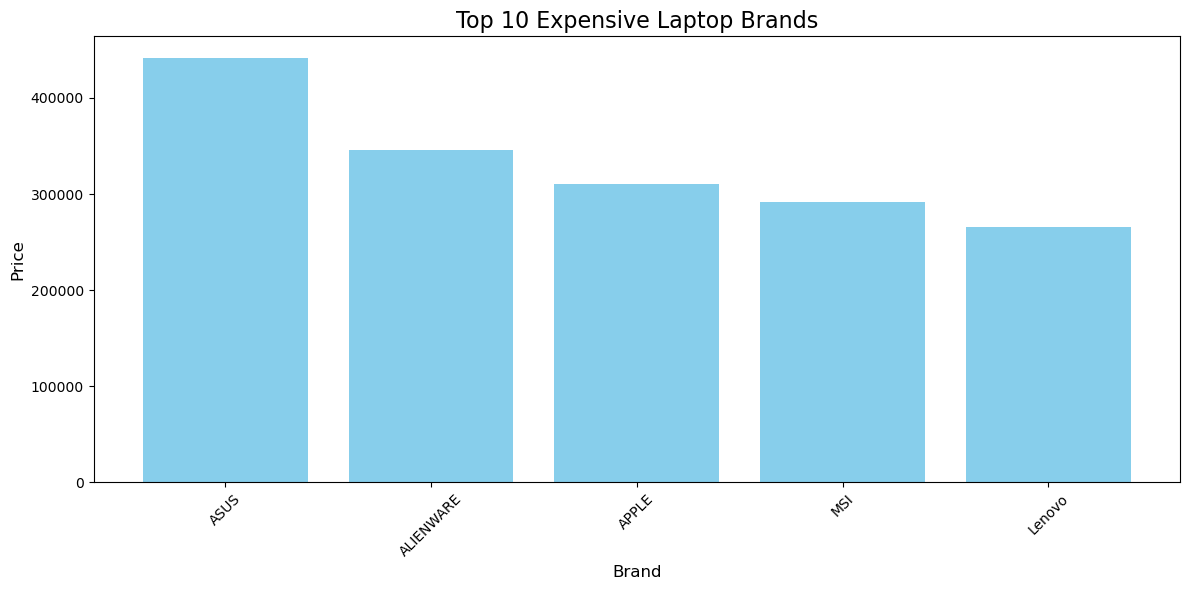

In [8]:

# Group data by brand and find the maximum price for each brand
brand_max_price = df.groupby('brand')['latest_price'].max()

# Get the top  most expensive laptop brands
top = df.nlargest(10, 'latest_price')

plt.figure(figsize=(12, 6))
bars = plt.bar(top['brand'], top['latest_price'], color='skyblue')

# Add labels and title
plt.ylabel('Price', fontsize=12)
plt.xlabel("Brand", fontsize=12)
plt.title("Top 10 Expensive Laptop Brands", fontsize=16)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show plot
plt.tight_layout()
plt.show()


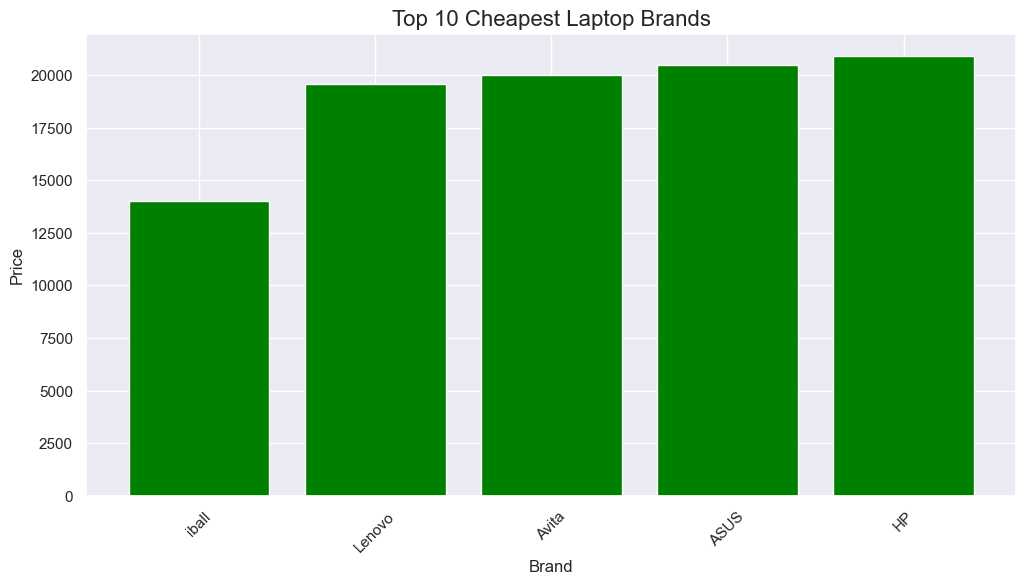

In [ ]:


# Group data by brand and find the minimum price for each brand
brand_min_price = df.groupby('brand')['latest_price'].min()

# Get the top  cheapest laptop brands
top10 = df.nsmallest(10, 'latest_price')

plt.figure(figsize=(12, 6))
bars = plt.bar(top10['brand'], top10['latest_price'], color='green')

# Add labels and title
plt.ylabel('Price', fontsize=12)
plt.xlabel("Brand", fontsize=12)
plt.title("Top 10 Cheapest Laptop Brands", fontsize=16)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)
plt.show()


Visualization of the  Brands based on latest_price

In [9]:


# Create sunburst chart
fig = px.sunburst(df, 
                  path=['brand', 'model'], 
                  values='latest_price', 
                  color='brand',
                  color_continuous_scale='Blues')  # Choose a color scale

# Customize hover information
fig.update_traces(hovertemplate='<b>Brand:</b> %{label}<br>' +
                                 '<b>Model:</b> %{parent}<br>' +
                                 '<b>Price:</b> $%{value}')

# Show the chart
fig.show()


Analyze numerical features


In [11]:
numeric= ['latest_price', 'old_price','ratings', 'reviews']

Text(0.5, 0.98, 'Visualizing continuous columns')

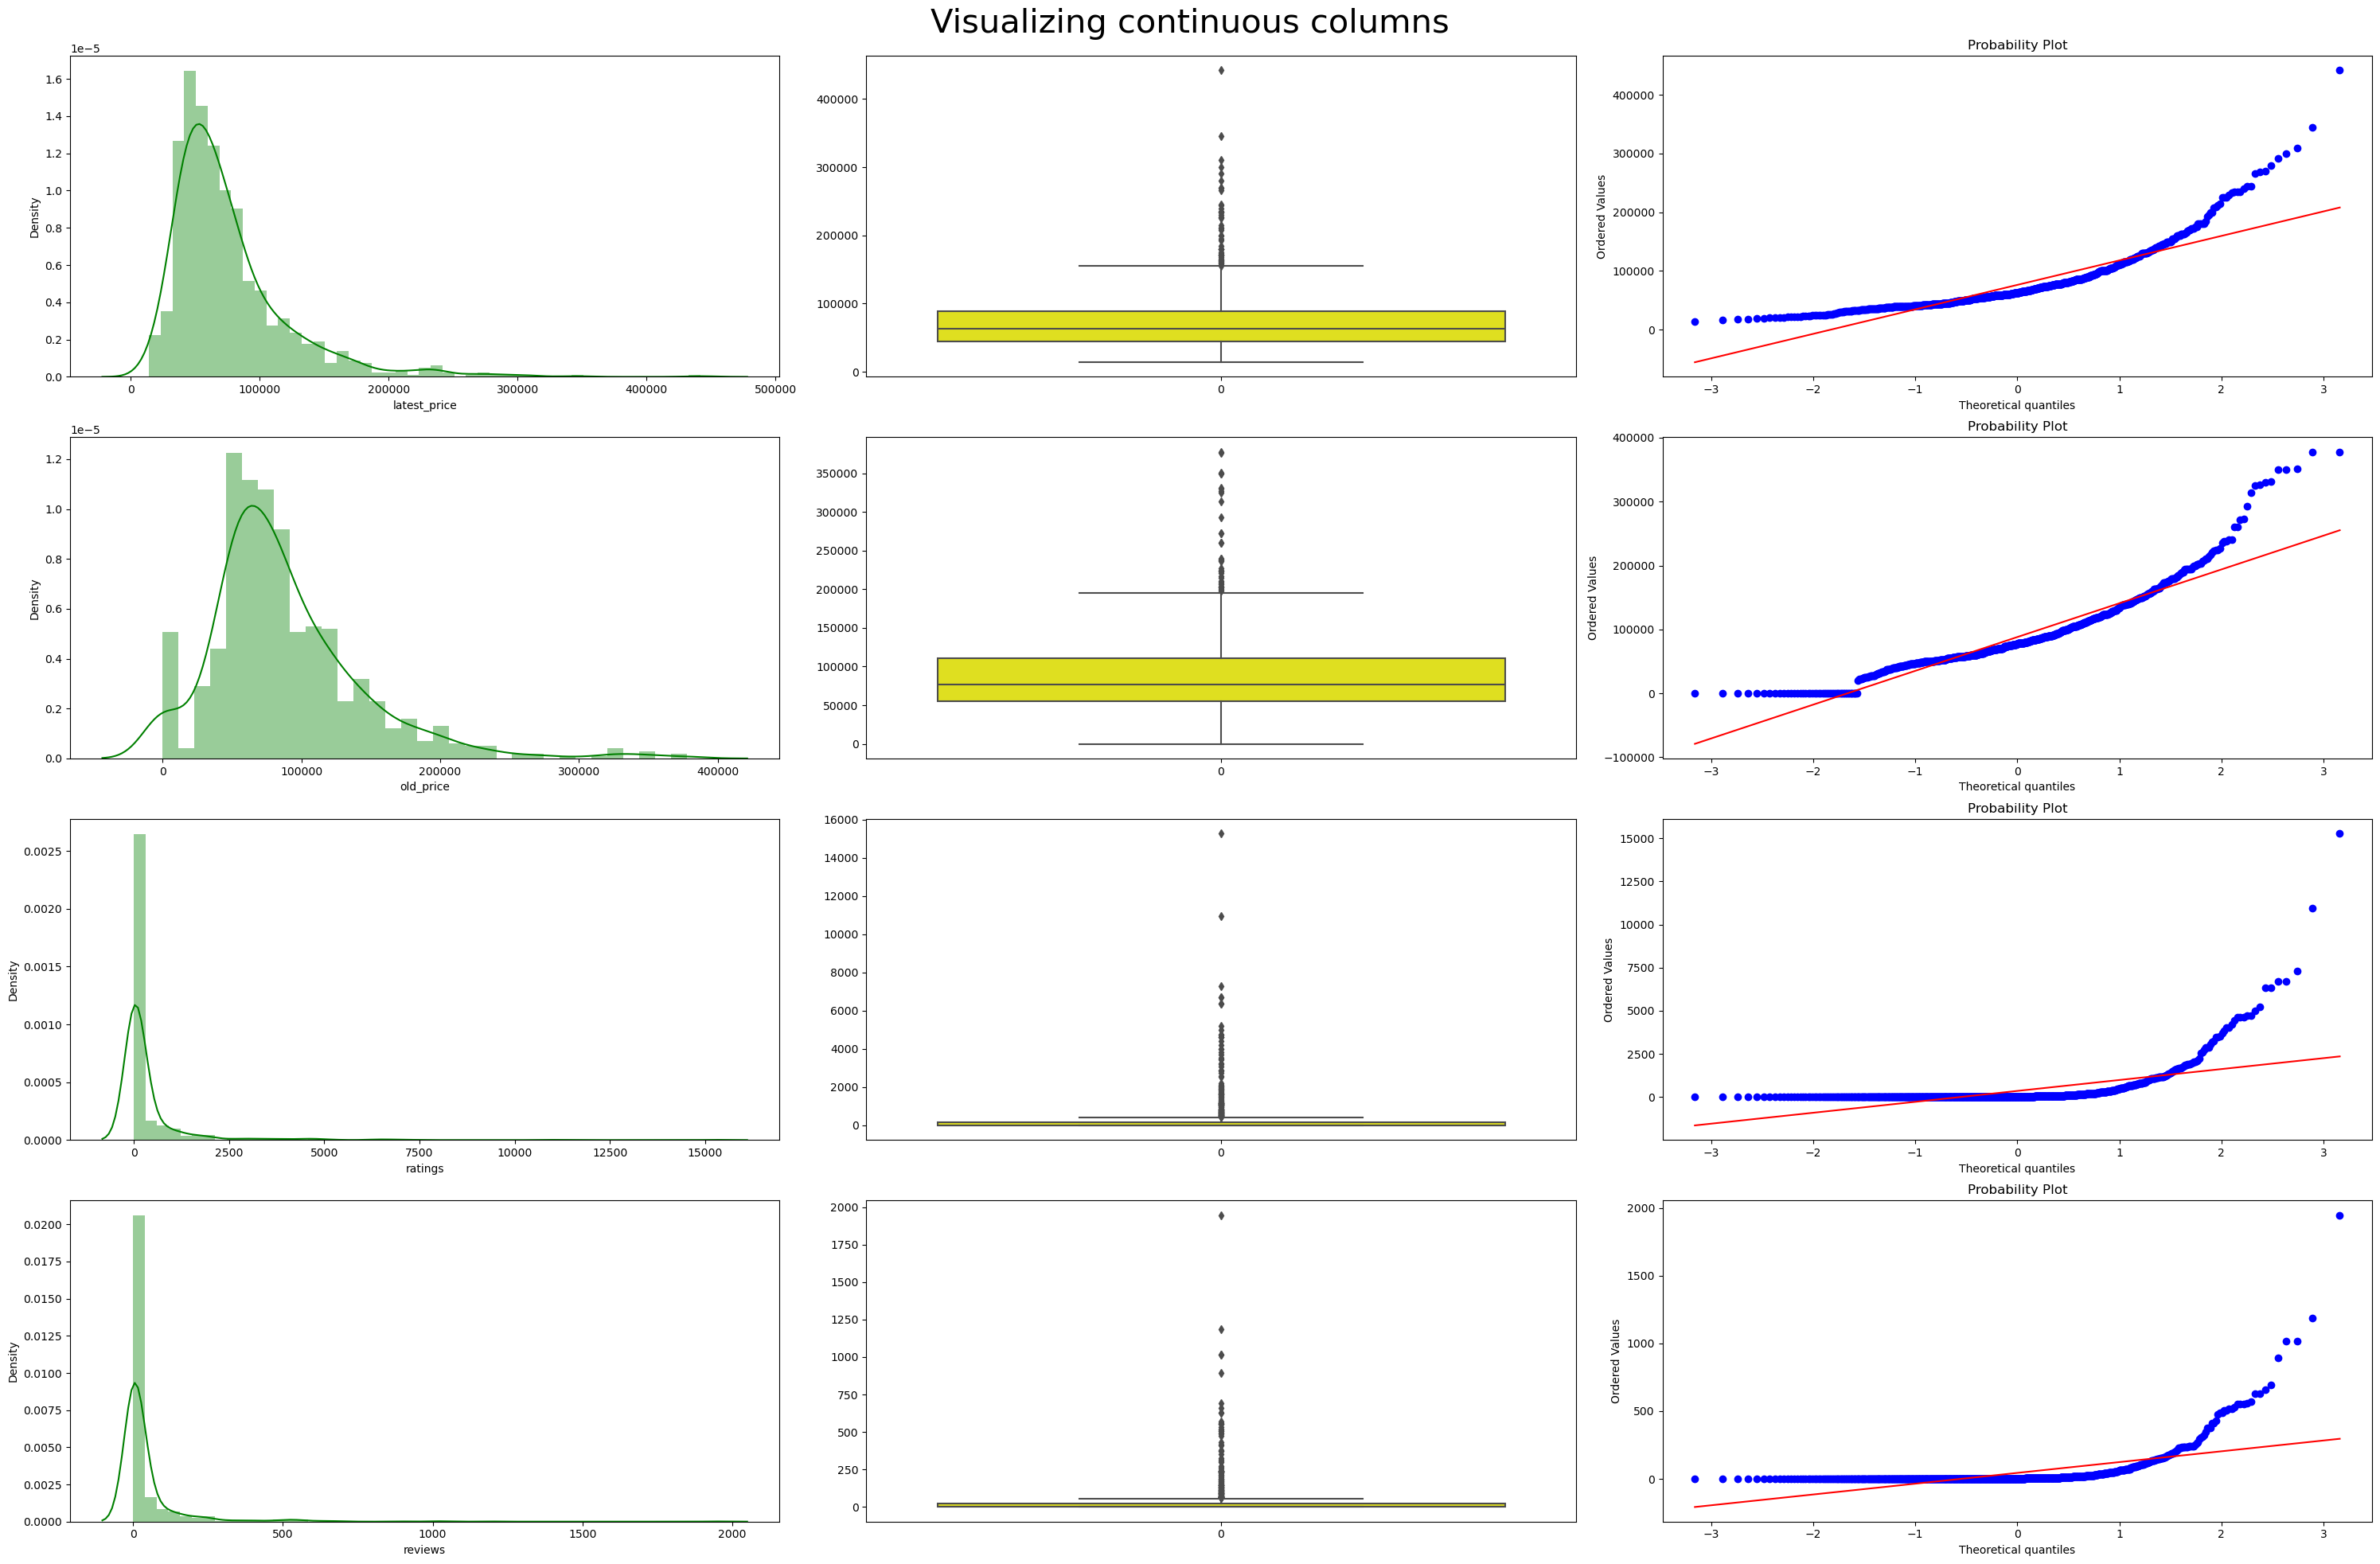

In [12]:
fig,ax = plt.subplots(len(numeric),3,figsize=(30,20))
for index,i in enumerate(numeric):
    sns.distplot(df[i],ax=ax[index,0],color='green')
    sns.boxplot(df[i],ax=ax[index,1],color='yellow')
    stats.probplot(df[i],plot=ax[index,2])
    
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.suptitle("Visualizing continuous columns",fontsize=30)

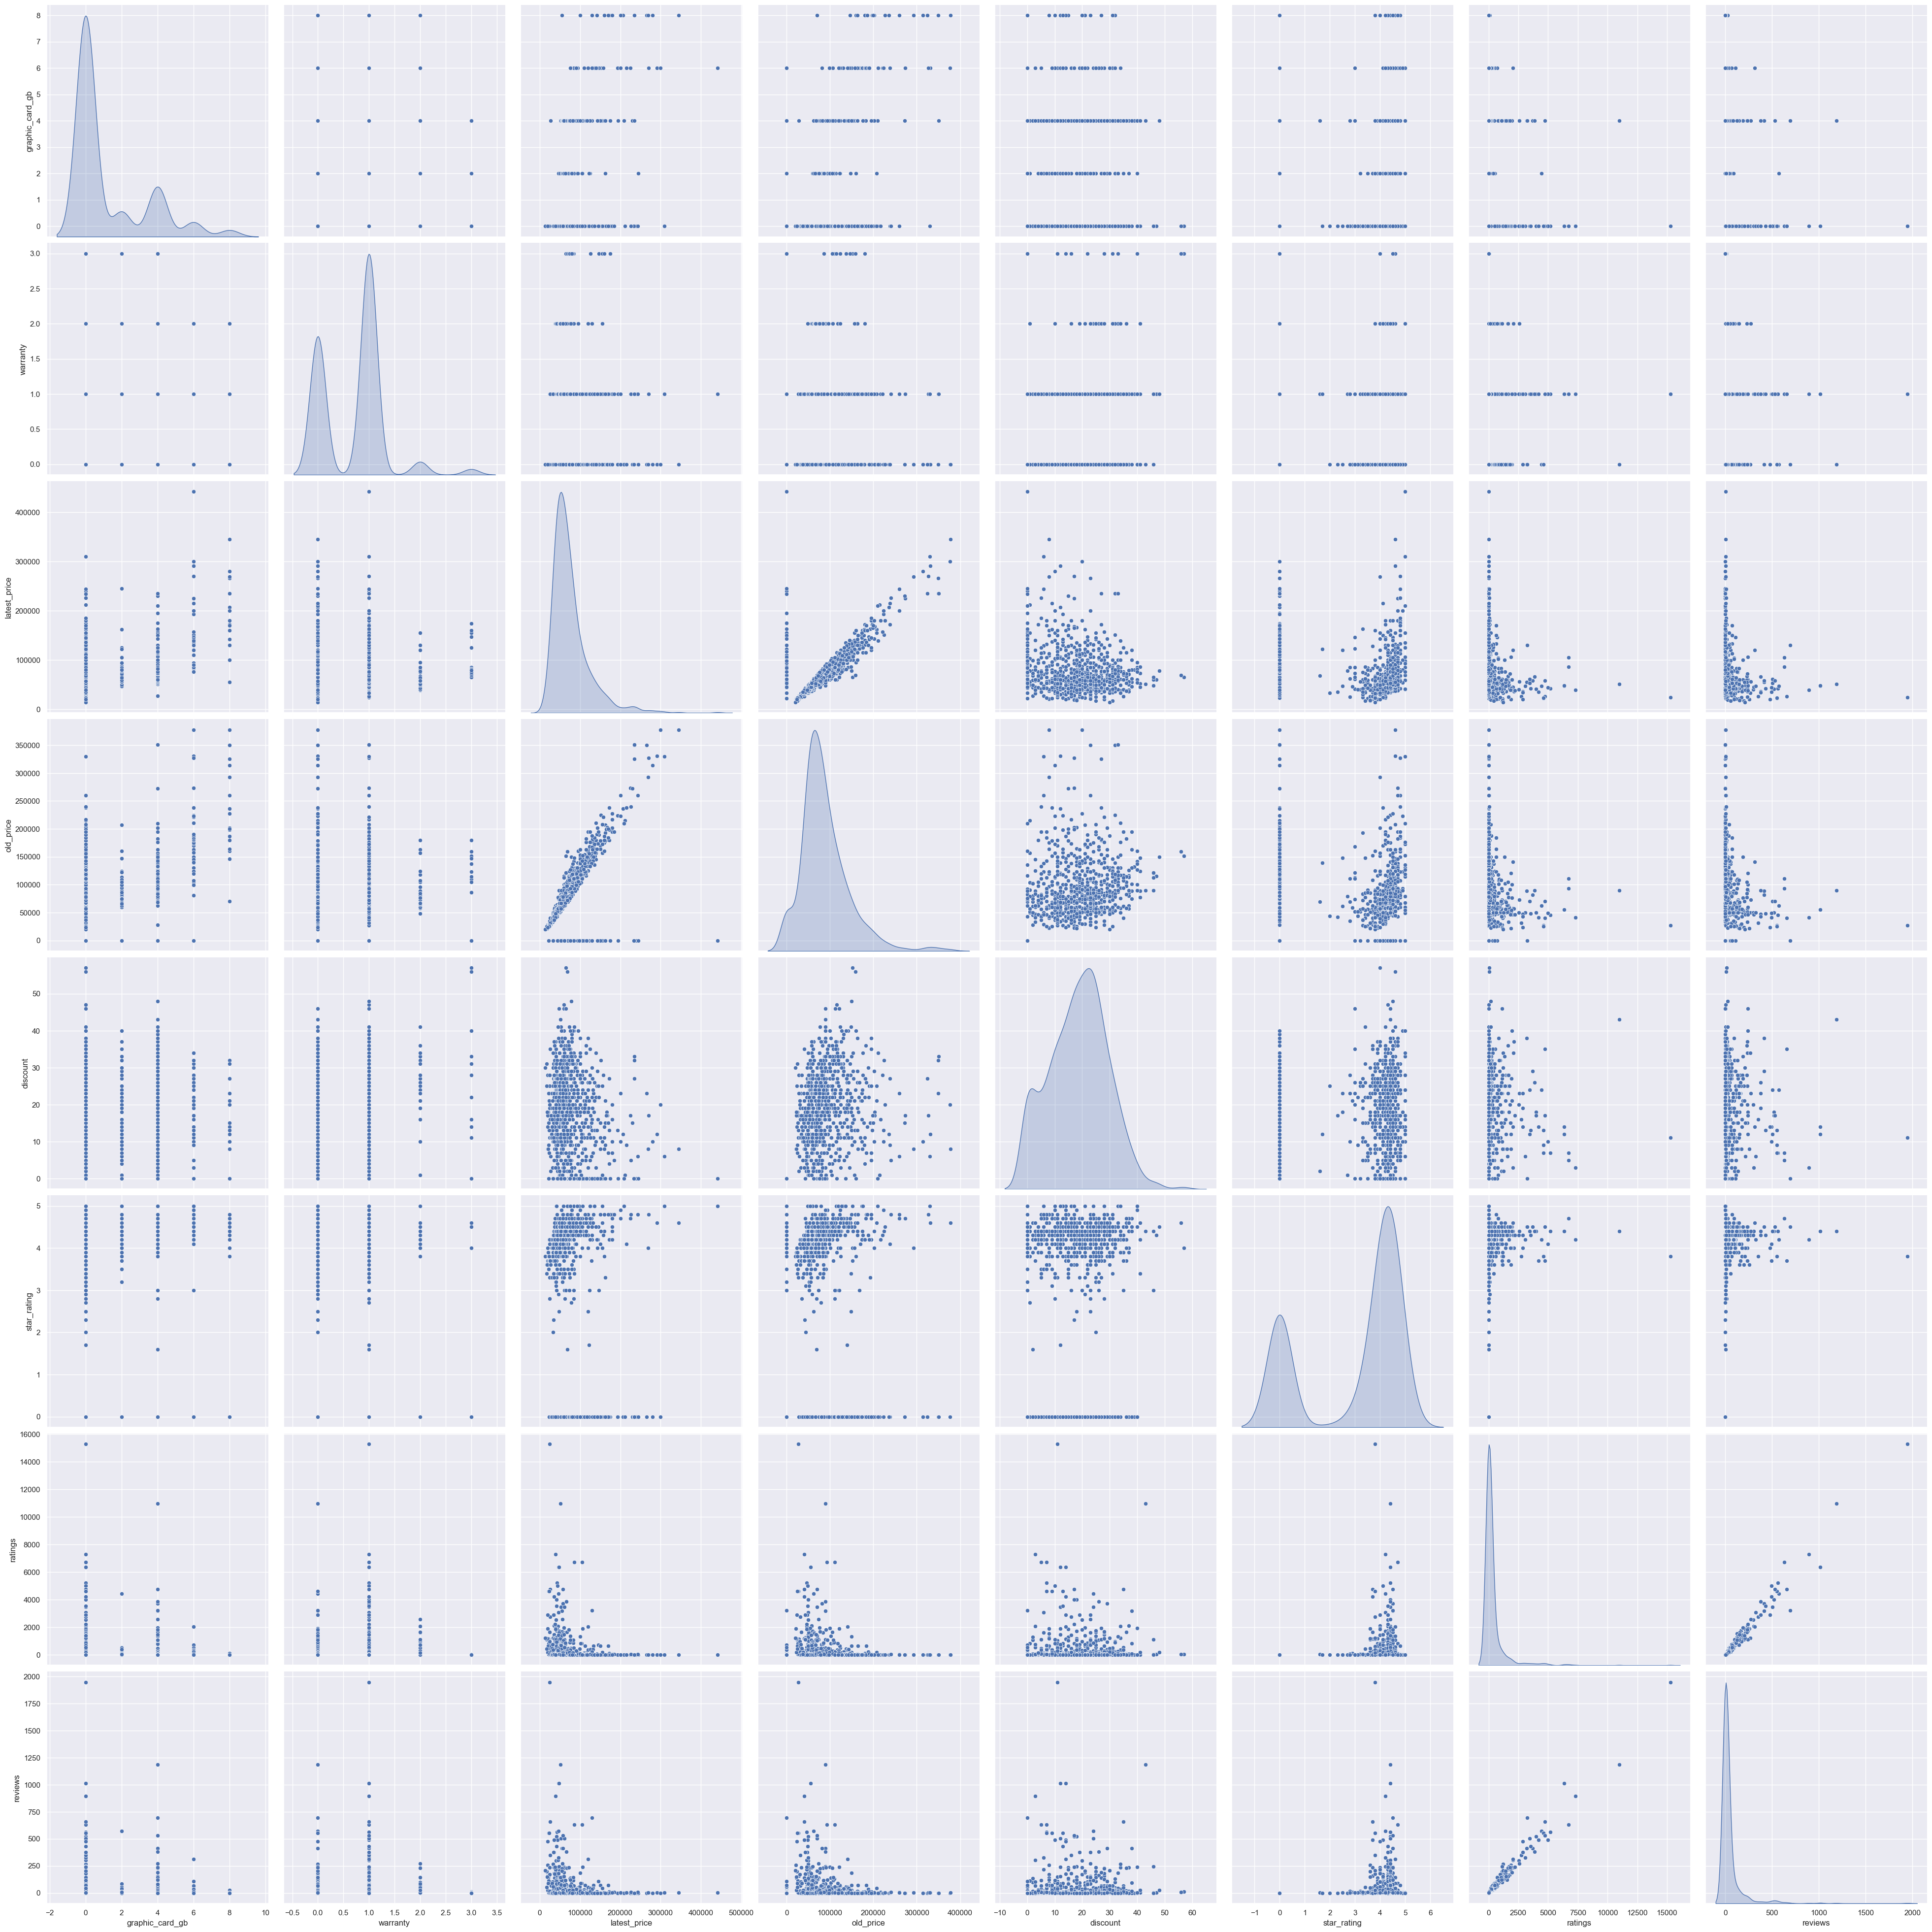

In [ ]:
sns.set()
sns.pairplot(df,height = 5 ,kind ='scatter',diag_kind='kde')
plt.show()

From the above graph we can see high correlation between two pairs.
One is ratings and reviews and the other one is old_price and the latest_price.

In [13]:
df.columns

Index(['brand', 'model', 'processor_brand', 'processor_name',
       'processor_gnrtn', 'ram_gb', 'ram_type', 'ssd', 'hdd', 'os', 'os_bit',
       'graphic_card_gb', 'weight', 'display_size', 'warranty', 'Touchscreen',
       'msoffice', 'latest_price', 'old_price', 'discount', 'star_rating',
       'ratings', 'reviews'],
      dtype='object')

Lets work on categorical features.

In [16]:
categorical_features=['brand', 'processor_brand', 'processor_name',
       'processor_gnrtn', 'ram_gb', 'ram_type', 'ssd', 'hdd', 'os', 'os_bit',
       'graphic_card_gb', 'weight', 'display_size', 'warranty', 'Touchscreen',
       'msoffice', 'discount', 'star_rating']

Lets create count plot for each categorical feature in the dataset.

<Figure size 1500x2500 with 0 Axes>

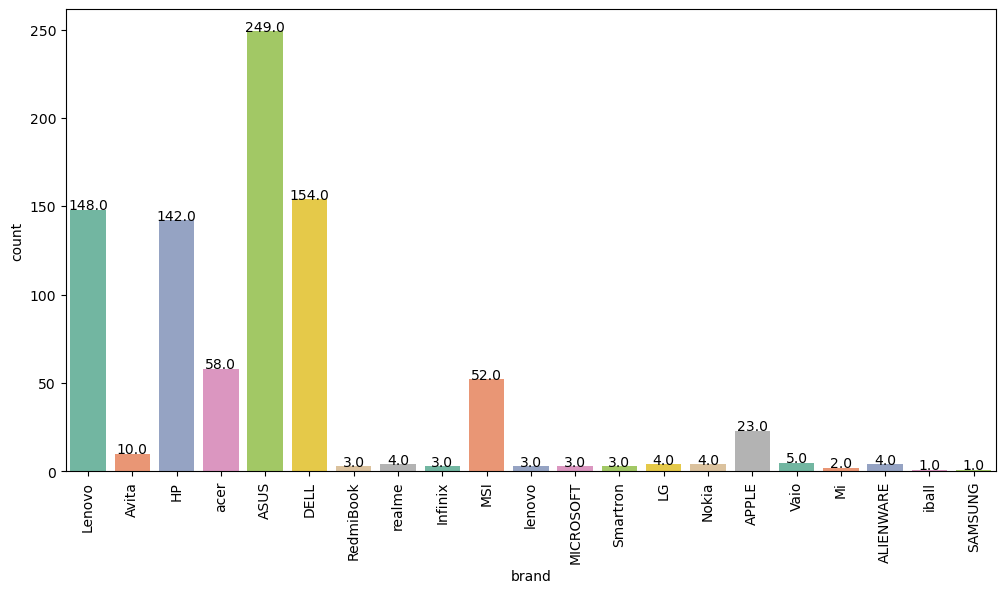

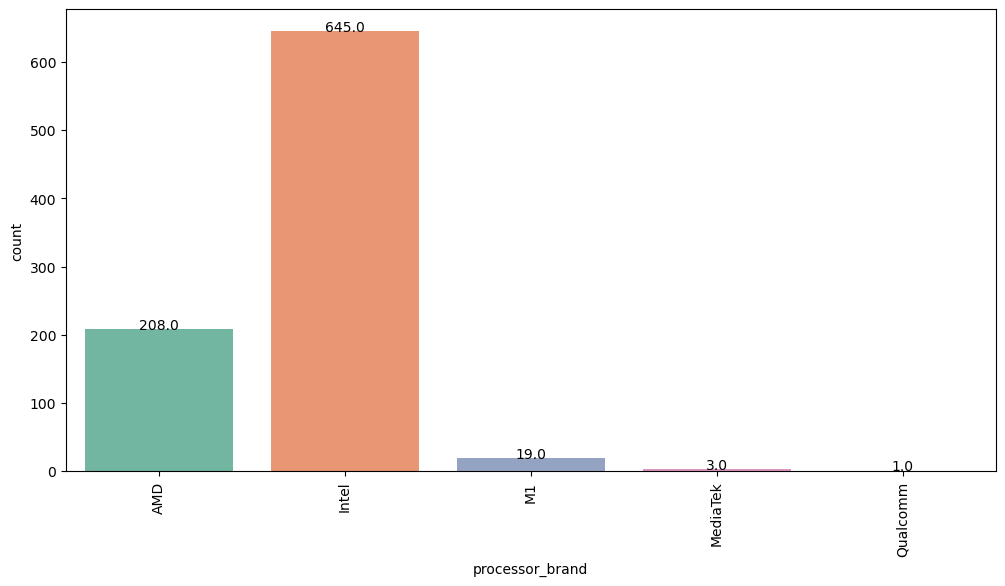

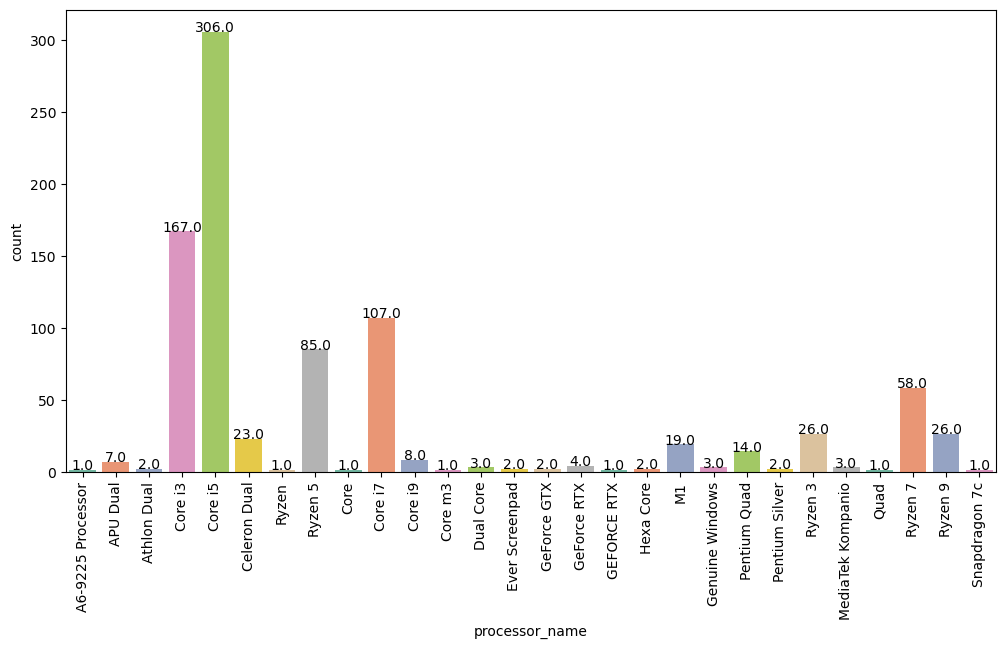

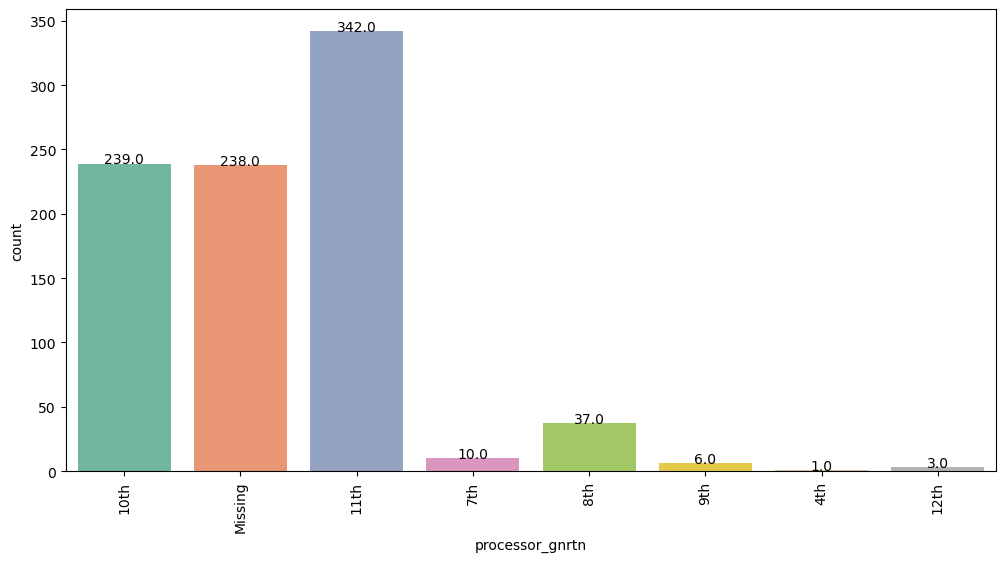

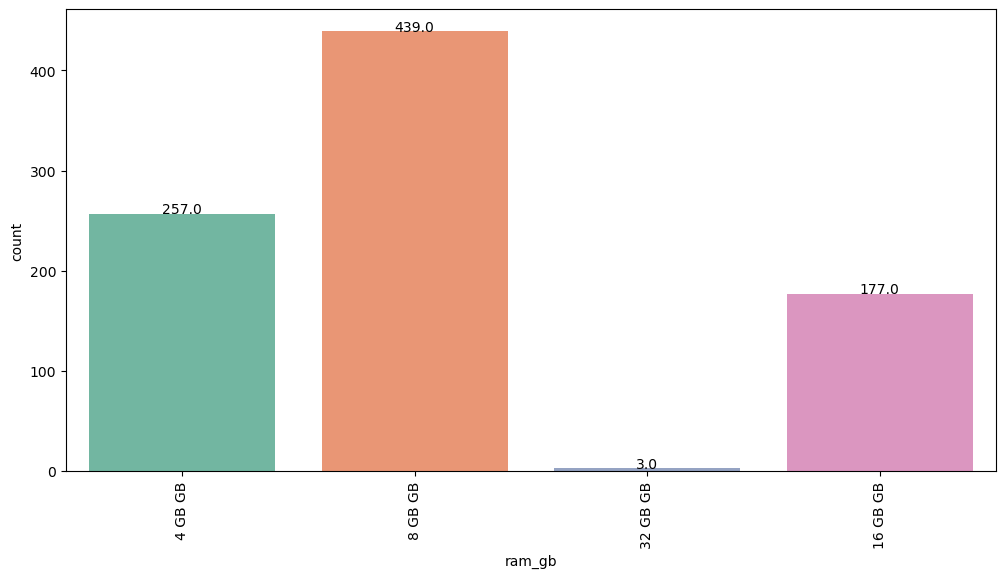

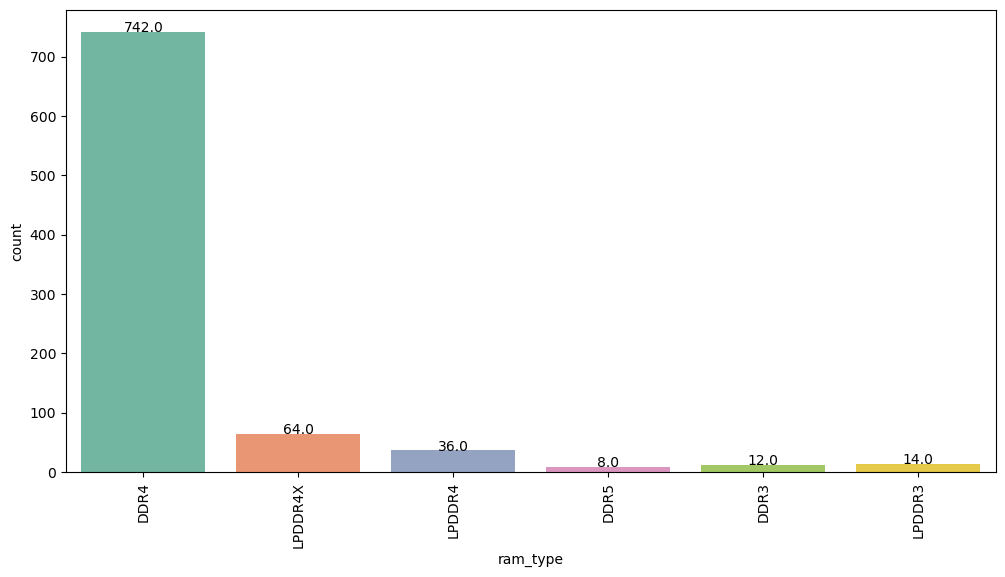

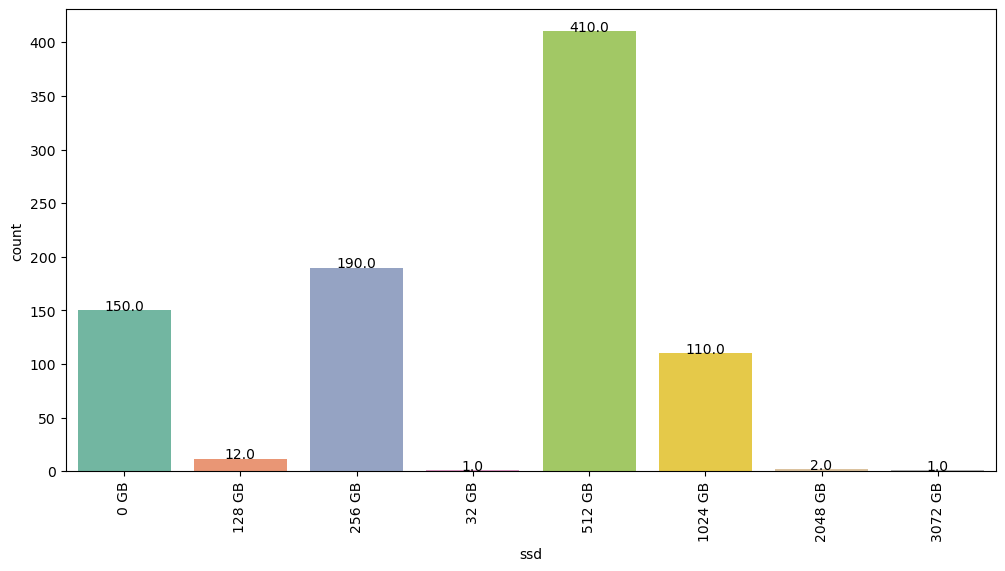

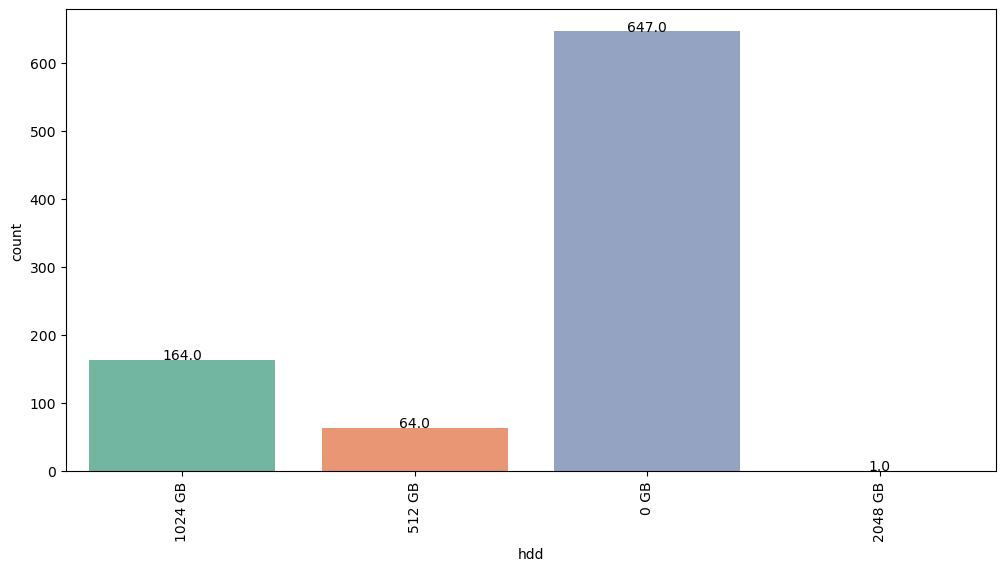

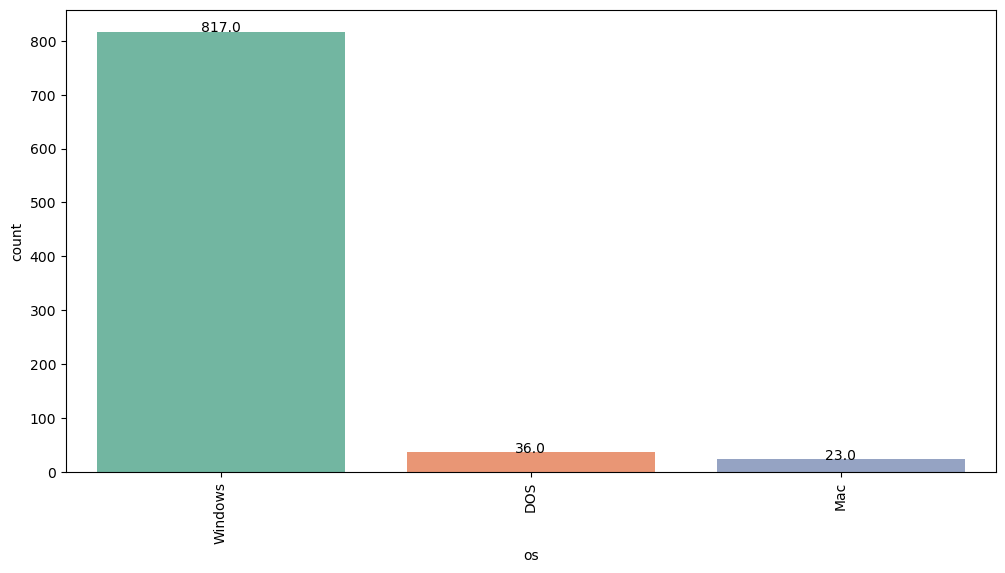

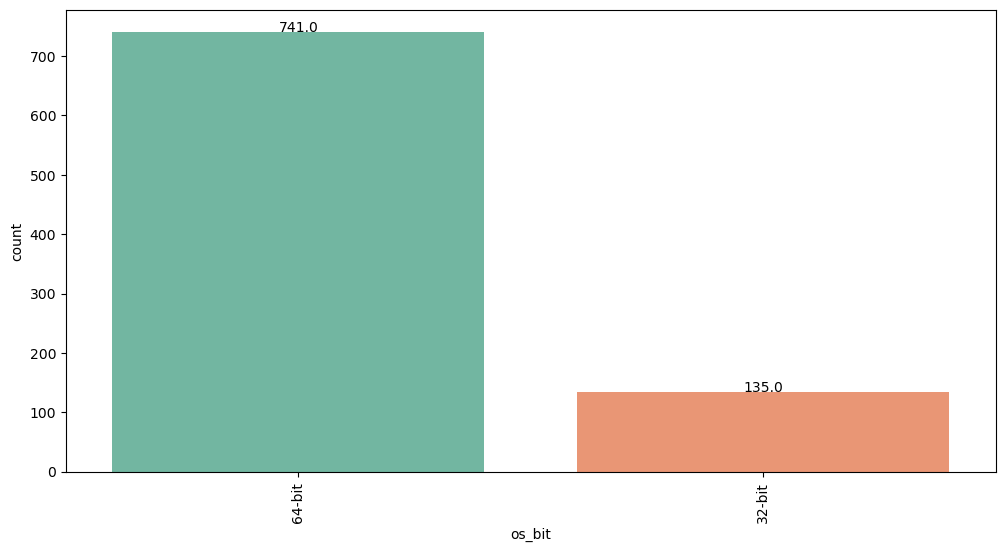

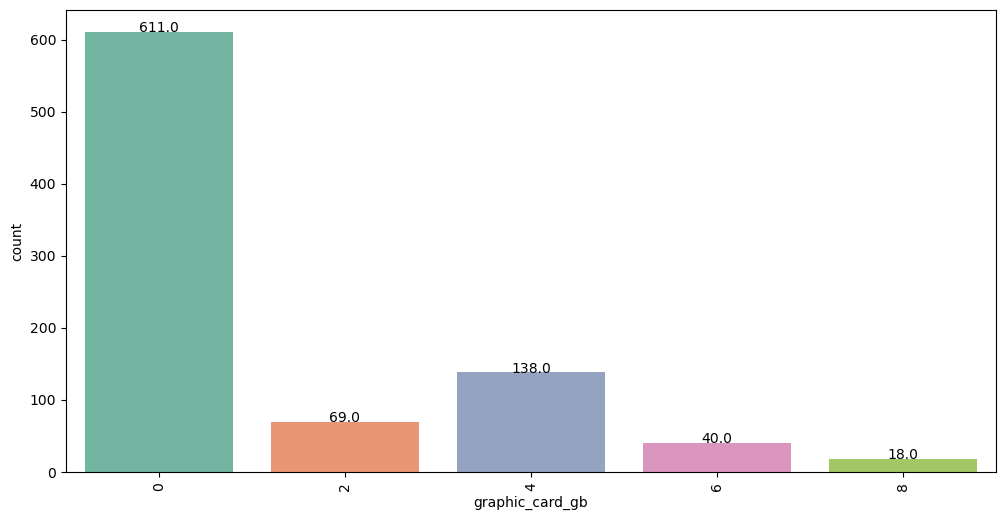

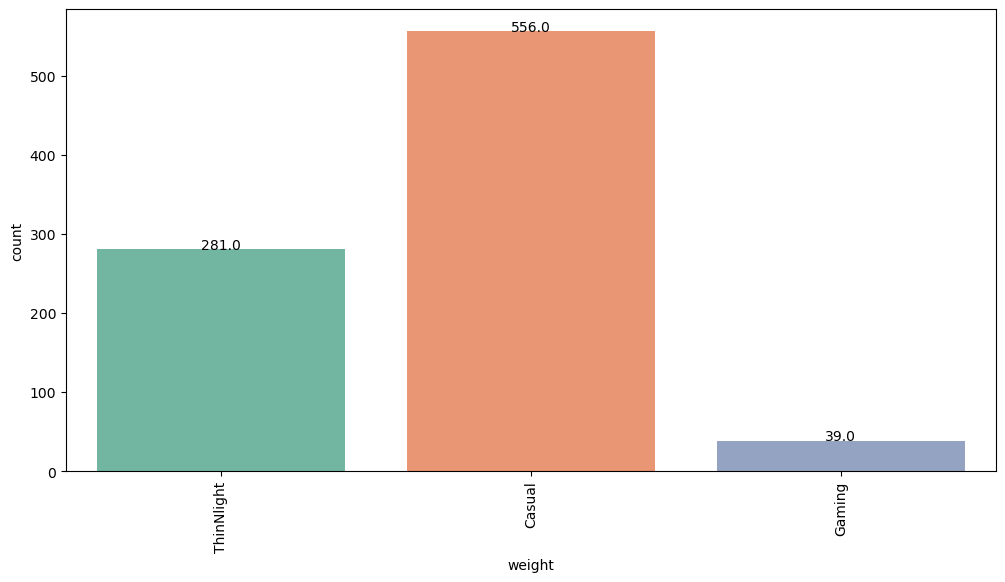

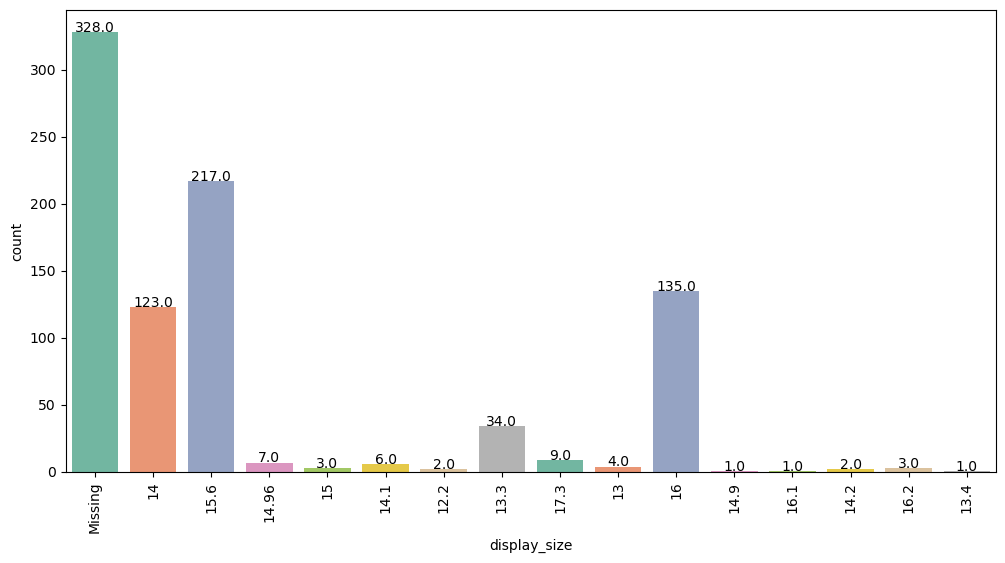

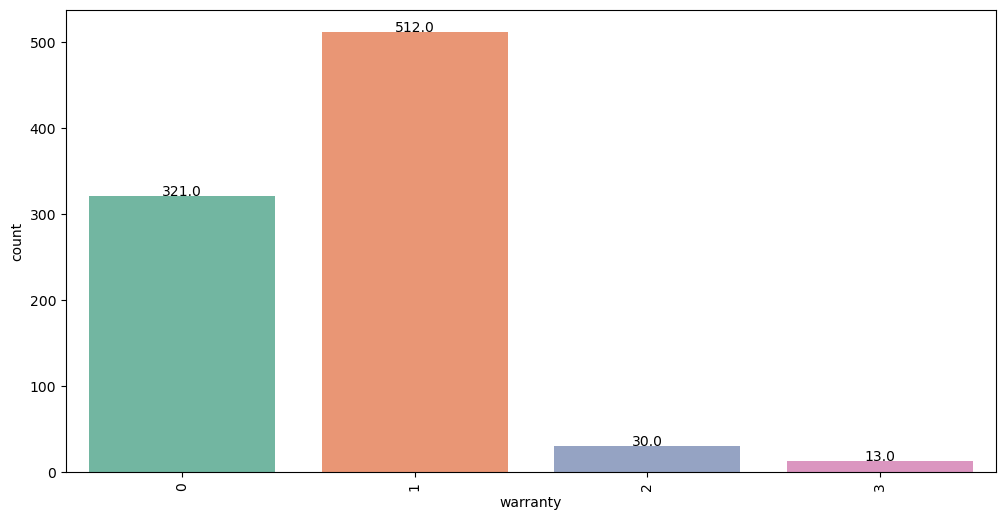

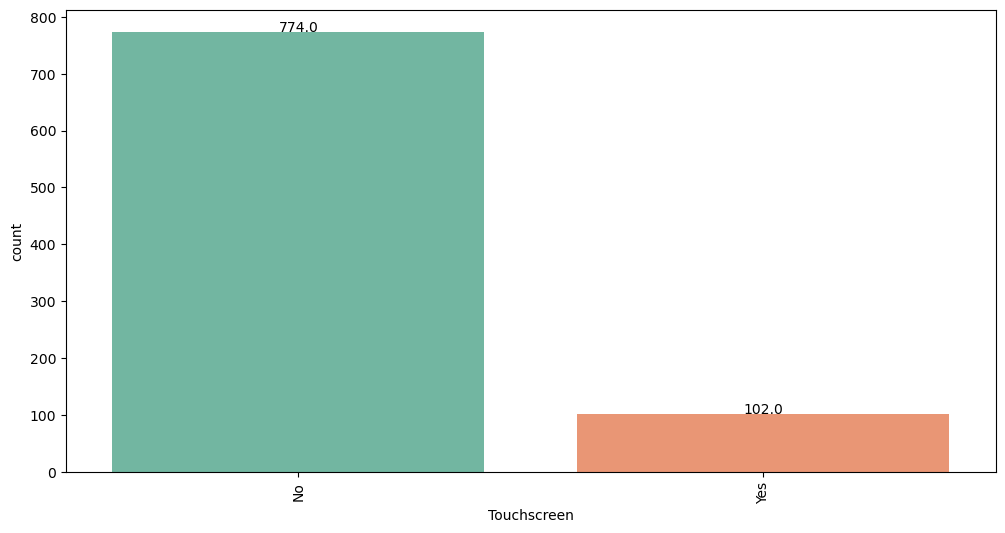

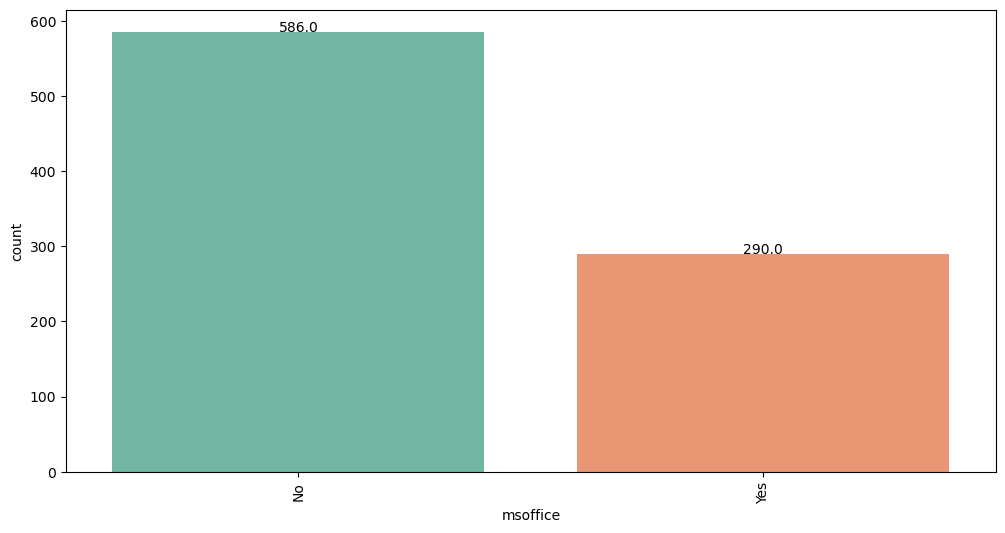

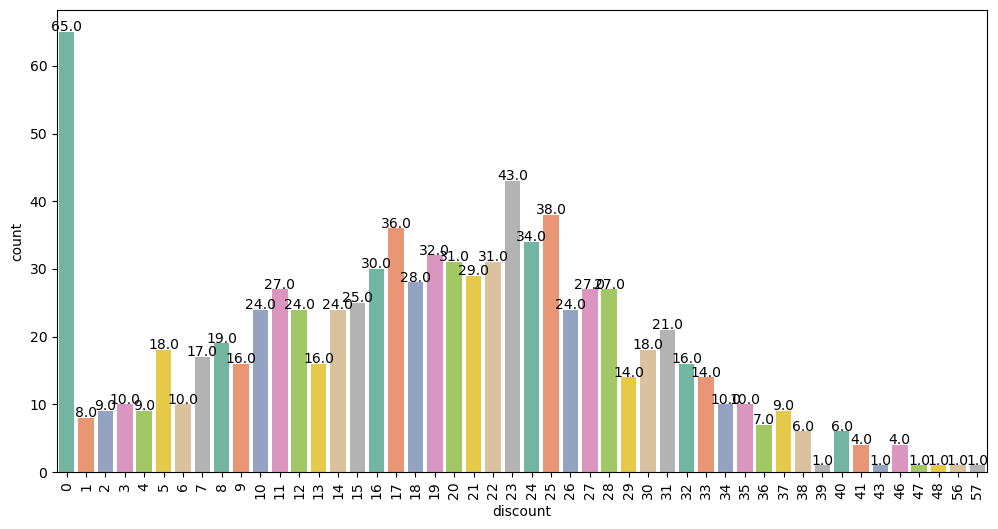

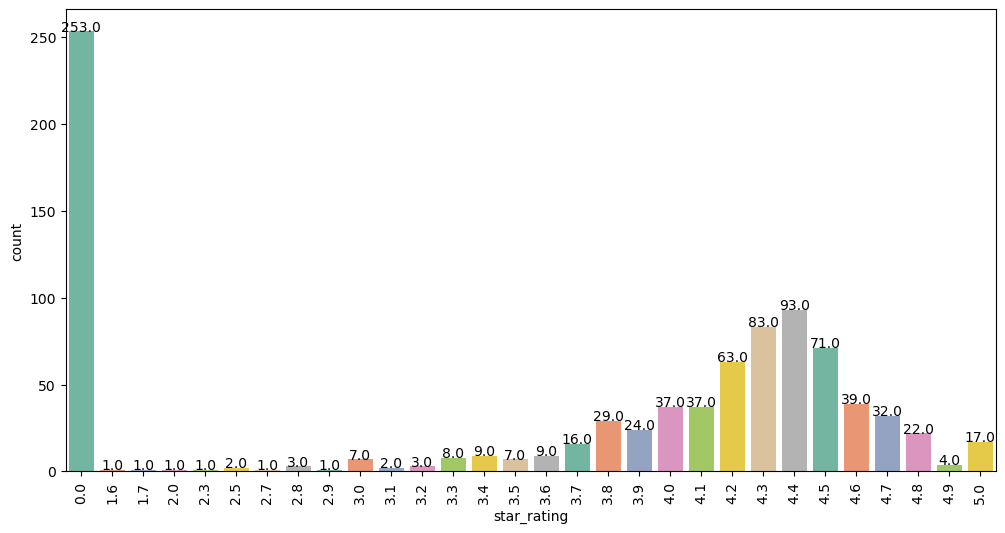

In [17]:
i=1
plt.figure(figsize = (15,25))
for feature in categorical_features:
  fig, ax1 = plt.subplots(figsize=(12,6))
  graph = sns.countplot(ax=ax1,x = feature , data = df, palette='Set2')
  graph.set_xticklabels(graph.get_xticklabels(),rotation=90)
  for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")
  i+=1

  plt.show()


Lets see correlation matrix to see how features are correlated with each other.

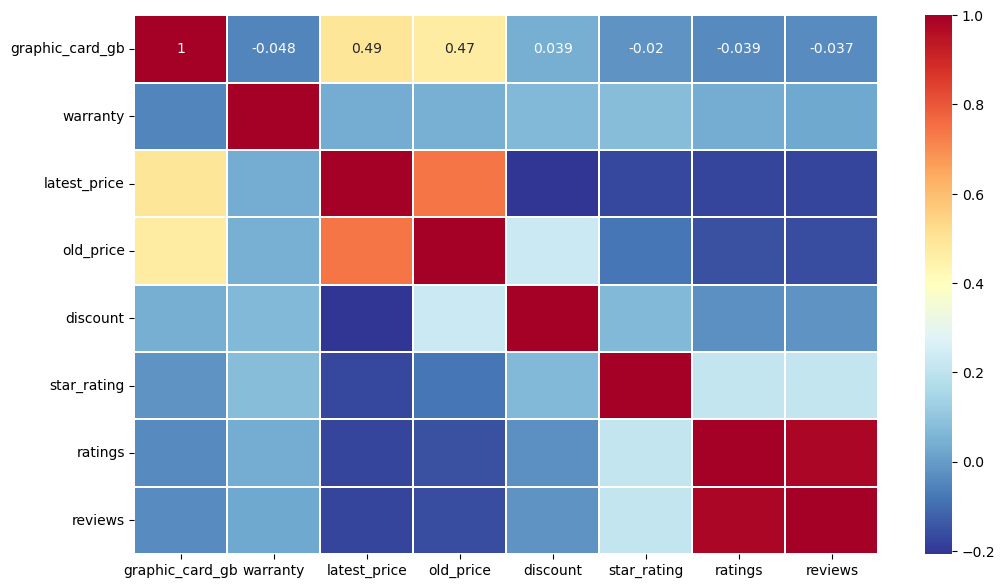

In [18]:
# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Calculate correlations
corr_ = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(12, 7))
sns.heatmap(corr_, annot=True, linewidths=.2, cmap='RdYlBu_r')
plt.show()



In [20]:
df.isnull().sum()

brand              0
model              0
processor_brand    0
processor_name     0
processor_gnrtn    0
ram_gb             0
ram_type           0
ssd                0
hdd                0
os                 0
os_bit             0
graphic_card_gb    0
weight             0
display_size       0
warranty           0
Touchscreen        0
msoffice           0
latest_price       0
old_price          0
discount           0
star_rating        0
ratings            0
reviews            0
dtype: int64

In [21]:
df['processor_gnrtn'].value_counts().to_frame() 

,count
processor_gnrtn,
11th,342
10th,239
Missing,238
8th,37
7th,10
9th,6
12th,3
4th,1


In [22]:
df['display_size'].value_counts().to_frame()

,count
display_size,
Missing,328
15.6,217
16,135
14,123
13.3,34
17.3,9
14.96,7
14.1,6
13,4


In [23]:
#Replacing the missing values.
df.replace('Missing', np.NaN,inplace=True)

In [26]:
df.isna().sum()

brand                0
model               95
processor_brand      0
processor_name       0
processor_gnrtn    238
ram_gb               0
ram_type             0
ssd                  0
hdd                  0
os                   0
os_bit               0
graphic_card_gb      0
weight               0
display_size       328
warranty             0
Touchscreen          0
msoffice             0
latest_price         0
old_price            0
discount             0
star_rating          0
ratings              0
reviews              0
dtype: int64

In [27]:
df.columns

Index(['brand', 'model', 'processor_brand', 'processor_name',
       'processor_gnrtn', 'ram_gb', 'ram_type', 'ssd', 'hdd', 'os', 'os_bit',
       'graphic_card_gb', 'weight', 'display_size', 'warranty', 'Touchscreen',
       'msoffice', 'latest_price', 'old_price', 'discount', 'star_rating',
       'ratings', 'reviews'],
      dtype='object')

In [28]:
ind=range(876)
df['Index']=ind
df=df.set_index('Index')

In [32]:
df

,brand,model,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,...,display_size,warranty,Touchscreen,msoffice,latest_price,old_price,discount,star_rating,ratings,reviews
Index,,,,,,,,,,,,,,,,,,,,,
0,Lenovo,A6-9225,AMD,A6-9225 Processor,10th,4 GB GB,DDR4,0 GB,1024 GB,Windows,...,NaN,0,No,No,24990,32790,23,3.7,63,12
1,Lenovo,Ideapad,AMD,APU Dual,10th,4 GB GB,DDR4,0 GB,512 GB,Windows,...,NaN,0,No,No,19590,21325,8,3.6,1894,256
2,Avita,PURA,AMD,APU Dual,10th,4 GB GB,DDR4,128 GB,0 GB,Windows,...,NaN,0,No,No,19990,27990,28,3.7,1153,159
3,Avita,PURA,AMD,APU Dual,10th,4 GB GB,DDR4,128 GB,0 GB,Windows,...,NaN,0,No,No,21490,27990,23,3.7,1153,159
4,Avita,PURA,AMD,APU Dual,10th,4 GB GB,DDR4,256 GB,0 GB,Windows,...,NaN,0,No,No,24990,33490,25,3.7,1657,234
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,ASUS,ROG,AMD,Ryzen 9,NaN,4 GB GB,DDR4,1024 GB,0 GB,Windows,...,16,1,No,No,144990,194990,25,0.0,0,0
872,ASUS,Ryzen,AMD,Ryzen 9,NaN,4 GB GB,DDR4,1024 GB,0 GB,Windows,...,NaN,1,No,No,149990,0,0,0.0,0,0
873,ASUS,Ryzen,AMD,Ryzen 9,NaN,4 GB GB,DDR4,1024 GB,0 GB,Windows,...,16,1,No,No,142990,0,0,0.0,0,0


Lets perform feature engineering on some of the columns.

In [33]:
#Numerical features
TX=['processor_gnrtn','ram_gb','ssd','hdd','display_size']

In [34]:
#Categorical features
CH=['brand','processor_brand','processor_name','ram_type','os','os_bit','weight','Touchscreen', 'msoffice']

In [35]:
for feature in CH:
    # Perform one-hot encoding on the current feature
    one_hot_encoded = pd.get_dummies(df[feature], prefix=feature)
    
    # Merge the one-hot encoded DataFrame with the original DataFrame
    df = pd.concat([df, one_hot_encoded], axis=1)
    df.drop([feature], axis=1, inplace=True)


In [39]:
#filling the missing values
df.fillna('9999TH',inplace=True)

In [40]:
import re


In [41]:
#Removing non-digit characters and converting the remaining part to a float.
for feature in TX:
  K=list(df[feature])
  K1=[float(re.sub("\D","",i)) for i in K]
  df[feature]=K1

In [46]:
df

,model,processor_gnrtn,ram_gb,ssd,hdd,graphic_card_gb,display_size,warranty,latest_price,old_price,...,os_Windows,os_bit_32-bit,os_bit_64-bit,weight_Casual,weight_Gaming,weight_ThinNlight,Touchscreen_No,Touchscreen_Yes,msoffice_No,msoffice_Yes
Index,,,,,,,,,,,,,,,,,,,,,
0,A6-9225,10.0,4.0,0.0,1024.0,0,9999.0,0,24990,32790,...,True,False,True,False,False,True,True,False,True,False
1,Ideapad,10.0,4.0,0.0,512.0,0,9999.0,0,19590,21325,...,True,False,True,True,False,False,True,False,True,False
2,PURA,10.0,4.0,128.0,0.0,0,9999.0,0,19990,27990,...,True,False,True,False,False,True,True,False,True,False
3,PURA,10.0,4.0,128.0,0.0,0,9999.0,0,21490,27990,...,True,False,True,False,False,True,True,False,True,False
4,PURA,10.0,4.0,256.0,0.0,0,9999.0,0,24990,33490,...,True,False,True,False,False,True,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,ROG,9999.0,4.0,1024.0,0.0,0,16.0,1,144990,194990,...,True,False,True,True,False,False,True,False,True,False
872,Ryzen,9999.0,4.0,1024.0,0.0,4,9999.0,1,149990,0,...,True,False,True,True,False,False,True,False,True,False
873,Ryzen,9999.0,4.0,1024.0,0.0,4,16.0,1,142990,0,...,True,False,True,True,False,False,True,False,True,False


Lets perform Imputation techniques for a complete dataframe

In [47]:
df.replace(9999, np.NaN,inplace=True)

In [48]:
df

,model,processor_gnrtn,ram_gb,ssd,hdd,graphic_card_gb,display_size,warranty,latest_price,old_price,...,os_Windows,os_bit_32-bit,os_bit_64-bit,weight_Casual,weight_Gaming,weight_ThinNlight,Touchscreen_No,Touchscreen_Yes,msoffice_No,msoffice_Yes
Index,,,,,,,,,,,,,,,,,,,,,
0,A6-9225,10.0,4.0,0.0,1024.0,0,NaN,0,24990,32790,...,True,False,True,False,False,True,True,False,True,False
1,Ideapad,10.0,4.0,0.0,512.0,0,NaN,0,19590,21325,...,True,False,True,True,False,False,True,False,True,False
2,PURA,10.0,4.0,128.0,0.0,0,NaN,0,19990,27990,...,True,False,True,False,False,True,True,False,True,False
3,PURA,10.0,4.0,128.0,0.0,0,NaN,0,21490,27990,...,True,False,True,False,False,True,True,False,True,False
4,PURA,10.0,4.0,256.0,0.0,0,NaN,0,24990,33490,...,True,False,True,False,False,True,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,ROG,NaN,4.0,1024.0,0.0,0,16.0,1,144990,194990,...,True,False,True,True,False,False,True,False,True,False
872,Ryzen,NaN,4.0,1024.0,0.0,4,NaN,1,149990,0,...,True,False,True,True,False,False,True,False,True,False
873,Ryzen,NaN,4.0,1024.0,0.0,4,16.0,1,142990,0,...,True,False,True,True,False,False,True,False,True,False


In [49]:
df.drop('model', axis=1, inplace= True)

In [50]:
from sklearn.impute import KNNImputer

In [51]:
#KNN imputation technique
imputate = KNNImputer(n_neighbors=10, weights='uniform')

In [52]:
l=imputate.fit_transform(df)

In [54]:
df1= pd.DataFrame(l,columns=df.columns)

In [57]:
df1

,processor_gnrtn,ram_gb,ssd,hdd,graphic_card_gb,display_size,warranty,latest_price,old_price,discount,...,os_Windows,os_bit_32-bit,os_bit_64-bit,weight_Casual,weight_Gaming,weight_ThinNlight,Touchscreen_No,Touchscreen_Yes,msoffice_No,msoffice_Yes
0,10.0,4.0,0.0,1024.0,0.0,85.0,0.0,24990.0,32790.0,23.0,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
1,10.0,4.0,0.0,512.0,0.0,99.2,0.0,19590.0,21325.0,8.0,...,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2,10.0,4.0,128.0,0.0,0.0,99.2,0.0,19990.0,27990.0,28.0,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
3,10.0,4.0,128.0,0.0,0.0,99.2,0.0,21490.0,27990.0,23.0,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
4,10.0,4.0,256.0,0.0,0.0,85.0,0.0,24990.0,33490.0,25.0,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,10.4,4.0,1024.0,0.0,0.0,16.0,1.0,144990.0,194990.0,25.0,...,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
872,9.9,4.0,1024.0,0.0,4.0,41.7,1.0,149990.0,0.0,0.0,...,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
873,9.9,4.0,1024.0,0.0,4.0,16.0,1.0,142990.0,0.0,0.0,...,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
874,10.4,4.0,0.0,512.0,0.0,141.8,0.0,38990.0,47990.0,18.0,...,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0


Let's remove outliers from our present dataset as they can deviate the results.

In [94]:
from scipy import stats
import numpy as np

In [71]:
#calculate z scores
z_scores = stats.zscore(df1)

In [78]:
threshold = 3
outliers = (np.abs(z_scores)> threshold).any(axis=1)


In [80]:
df2 = df1[~outliers]

In [83]:
#Removing duplicate features
df2.drop(['old_price','reviews'],axis=1,inplace=True)

Machine Learning Models

In [107]:
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, r2_score

from sklearn.linear_model import LinearRegression, ElasticNet,Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error
import xgboost as xgb



In [96]:
y=df2['latest_price']
X=df2.drop(['latest_price'],axis=1)

In [97]:
X_train, X_test, Y_train, Y_test=train_test_split(X,y,test_size=0.2,random_state=42)

Model: LinearRegression
RMSE: 13667.703537608208
MAE: 9520.198774087203
R^2: 0.7778653087000218
------------------------------
Model: ElasticNet
RMSE: 16890.33347749261
MAE: 11681.415935872645
R^2: 0.6607641536809155
------------------------------
Model: XGBRegressor
RMSE: 13405.64027821685
MAE: 7391.1327574823945
R^2: 0.7863020226671362
------------------------------
Model: Ridge
RMSE: 13815.828306371877
MAE: 9608.509851633115
R^2: 0.7730244153361499
------------------------------


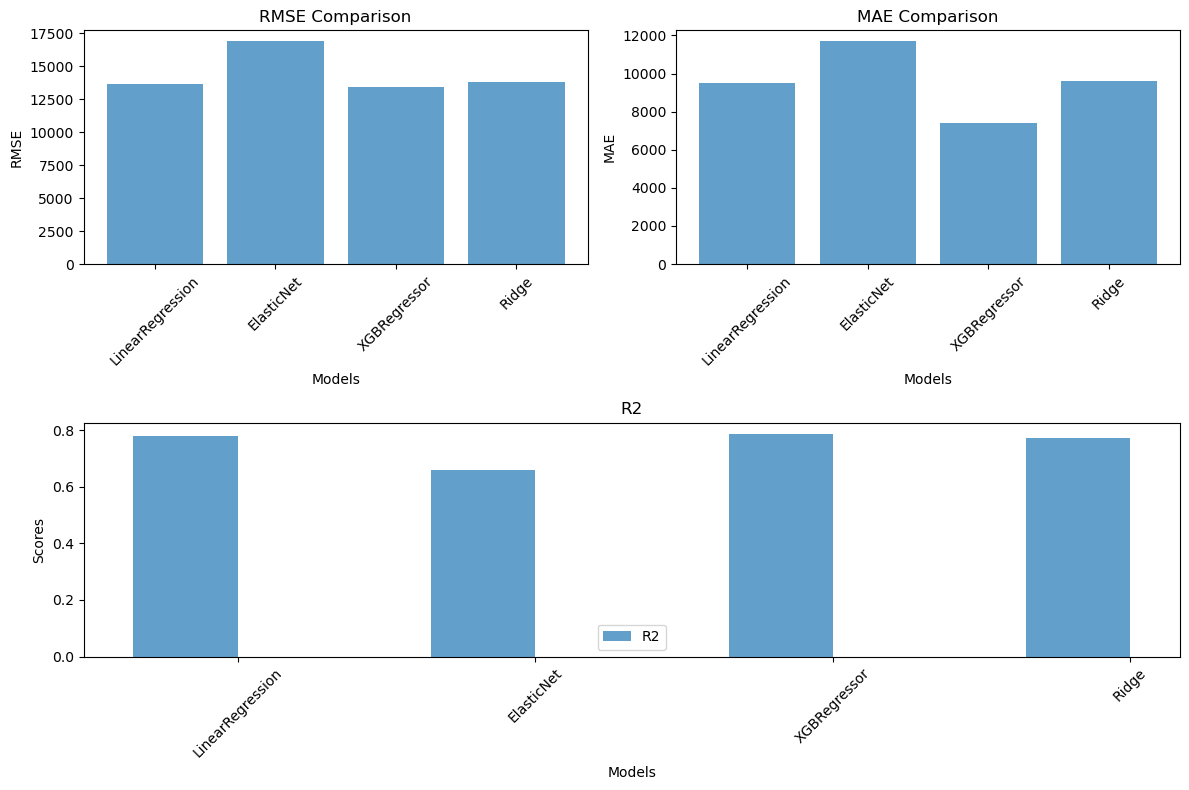

In [115]:


# Assuming X_train, X_test, Y_train, Y_test are defined appropriately

# Initialize models
models = [LinearRegression(), ElasticNet(), xgb.XGBRegressor(), Ridge()]

# Dictionary to store scores
scores = {
    'Model': [],
    'RMSE': [],
    'MAE': [],
    'R2': []
}

# Calculate metrics for each model
for m in models:
    m.fit(X_train, Y_train)
    y_pred = m.predict(X_test)
    
    # Calculate metrics
    rmse = np.sqrt(mean_squared_error(Y_test, y_pred))
    mae = mean_absolute_error(Y_test, y_pred)
    r2 = r2_score(Y_test, y_pred)
    
    # Extract model name without parameters for XGBRegressor
    model_name = str(m).split("(")[0]  # Extracts the model name before '('
    
    # Store scores
    scores['Model'].append(model_name)
    scores['RMSE'].append(rmse)
    scores['MAE'].append(mae)
    scores['R2'].append(r2)
    
    # Print scores (optional)
    print(f'Model: {model_name}')
    print(f'RMSE: {rmse}')
    print(f'MAE: {mae}')
    print(f'R^2: {r2}')
    print('-' * 30)

# Plotting
plt.figure(figsize=(12, 8))

# Plot RMSE
plt.subplot(2, 2, 1)
plt.bar(scores['Model'], scores['RMSE'], alpha=0.7)
plt.xlabel('Models')
plt.ylabel('RMSE')
plt.title('RMSE Comparison')
plt.xticks(rotation=45)

# Plot MAE
plt.subplot(2, 2, 2)
plt.bar(scores['Model'], scores['MAE'], alpha=0.7)
plt.xlabel('Models')
plt.ylabel('MAE')
plt.title('MAE Comparison')
plt.xticks(rotation=45)

# Plot R2 and MAE comparison
plt.subplot(2, 1, 2)
bar_width = 0.35
index = np.arange(len(scores['Model']))

bar1 = plt.bar(index, scores['R2'], bar_width, label='R2', alpha=0.7)


plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('R2')
plt.xticks(index + bar_width / 2, scores['Model'], rotation=45)
plt.legend()

plt.tight_layout()
plt.show()


Based on the comparison of R2 scores among the models evaluated, the XGBRegressor demonstrated the highest R2 score. 